Name: Suppawit Glawkate


StudentID: 23064676

Module: Machine Learning Algorithms

# Table of contents
1. [Introduction](#introduction)
2. [Importing libraries](#Importinglibraries)
3. [Reading the csv file](#ReadingCSV)
4. [Data Pre-processing](#Preprocessing)
   1. [Changing the column names](#ChangingColumnNames)
   2. [Checking for null values and unique elements in each columns](#NullValuesUniqueElements)
   3. [Performing Mode Imputation](#ModeImputation)
5. [Exploratory Data Analysis](#EDA)
6. [Initial model training stage](#InitTraining)
   1. [Splitting the data into training and testing](#InitSplit)
   2. [Training & Evaluating the models with confusion matrix](#TrainEval)
      1. [Training Categorical Naive Bayes, Decision Tree, Random Forest & Gradient Boosting](#TrainEval)
      2. [Classification report](#InitCR)
      3. [Confusion matrix](#InitCM)
7. [Feature selection](#FeatSelect)
   1. [Model Training with the one-hot encoded data (All features are used)](#TrainOHE)
      1. [Defining the columns to be One-Hot Encoded](#DefineOHECol)
      2. [Splitting the data](#OHESplit)
      3. [Training Categorical Naive Bayes, Decision Tree, Random Forest & Gradient Boosting](#OHEModelTraining)
      4. [Performance Evaluation](#OHEPerformanceEval)
         1. [Classification report](#OHECR)
         2. [Confusion matrix](#OHECM)
    2. [Model Training with binary-transformed dataset (All features are used)](#BinaryTransform)
       1. [Transforming the output variable from multi-class to binary class](#MultiToBinary)
       2. [Splitting the data and training](#BinarySplit)
       3. [Training Categorical Naive Bayes, Decision Tree, Random Forest & Gradient Boosting](#BinaryTraining)
       4. [Performance Evaluation](#BinaryPerformanceEval)
          1. [Classification report](#BinaryCR)
          2. [Confusion matrix](#BinaryCM)
          3. [ROC-AUC Score](#BinaryROC)
     3. [Model Training with binary-transformed + intuitively dropping features dataset](#BinaryIntuitive)
        1. [Defining the columns to be dropped intuitively](#BinaryIntuitiveDef)
        2. [Splitting the data](#BinaryIntuitiveSplit)
        3. [Training Random Forest and Gradient Boosting](#BinaryIntuitiveTraining)
        4. [Performance Evaluation](#BinaryIntuitivePerformanceEval)
           1. [Classification report](#BinaryIntuitiveCR)
           2. [Confusion matrix](#BinaryIntuitiveCM)
           3. [ROC-AUC Score](#BinaryIntuitiveROC)
      4. [Training the models with highly correlated features](#HighCorrFeat)
         1. [Identifying the columns that are highly correlated](#HighCorrFeatDef)
         2. [Splitting the data](#HighCorrFeatSplit)
         3. [Training Random Forest and Gradient Boosting](#HighCorrFeatTraining)
         4. [Performance Evaluation](#HighCorrFeatPerformanceEval)
            1. [Classification report](#HighCorrFeatCR)
            2. [Confusion matrix](#HighCorrFeatCM)
            3. [ROC-AUC Score](#HighCorrFeatROC)
      5. [Training the models features that have low correlated](#LowCorrFeat)
          1. [Identifying the features that have low correlation](#LowCorrFeatDef)
          2. [Splitting the data](#LowCorrFeatSplit)
          3. [Training Random Forest and Gradient Boosting](#LowCorrFeatTraining)
          4. [Performance Evaluation](#LowCorrFeatPerformanceEval)
             1. [Classification report](#LowCorrFeatCR)
             2. [Confusion matrix](#LowCorrFeatCM)
             3. [ROC-AUC Score](#LowCorrFeatROC)
     6. [Feature Importance - Random Forest Approach](#FeatureImportance)
8. [Highly correlated features](#FinalHighCorrFeat)
   1. [Splitting the data](#FinalHighCorrFeatSplit)
   2. [Training Random Forest and Gradient Boosting](#FinalHighCorrFeatTraining)
   3. [Performance Evaluation](#FinalHighCorrFeatPerformanceEval)
      1. [Classification report](#FinalHighCorrFeatCR)
      2. [Confusion matrix](#FinalHighCorrFeatCM)
      3. [ROC-AUC score & curve](#FinalHighCorrFeatROC)
9. [Conclusion](#conclusion)
10. [References](#References)

## Introduction <a name="introduction"></a>

This portfolio explores the Higher Education Students Performance Evaluation dataset sourced from the UC Irvine Machine Learning Repository. This specific dataset focuses on students who belong to the Faculty of Engineering and the Faculty of Educational Sciences in 2019. The primary objective is to perform data exploration on the dataset, implement data pre-processing and manipulation techniques, apply various Machine Learning algorithms, and evaluate their performances.

My main audience consists of individuals with a beginner to intermediate level of knowledge in Machine Learning, aiming to gain a better understanding of the Machine Learning Pipeline and how to evaluate their obtained results.

Additionally, I've formulated four research questions I aim to explore and answer within this portfolio.
The research questions are as followed:
- <b>RQ1</b>: How are classification models affected by a small dataset with numerous output classes?
- <b>RQ2</b>: Does One-Hot Encoding directly impact the performance of the chosen models?
- <b>RQ3</b>: How do highly correlated features affect model performance?
- <b>RQ4</b>: Is feature importance a superior approach to feature selection compared to the correlation coefficient?

## Importing libraries <a name="Importinglibraries"></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the csv file <a name="ReadingCSV"></a>

We can observe that the data is relatively small and has numerous columns with lengthy names. The reason for the lengthy column names is that the survey questions were used as the column names themselves.

In [3]:
df = pd.read_csv('../dataset/DATA_adapted.csv') # replace the file path with your file path where DATA_adapted.csv is located

In [4]:
df.head()

,Student ID,1- Student Age,2- Sex,3- Graduated high-school type,4- Scholarship type,5- Additional work,6- Regular artistic or sports activity,7- Do you have a partner,8- Total salary,9- Transportation to the university,...,23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable),24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3: never),25- Taking notes in classes,26- Listening in classes,27- Discussion improves my interest and success in the course,28- Flip-classroom,29- Cumulative grade point average in the last semester,30- Expected Cumulative grade point average in the graduatio,Course ID,OUTPUT Grade
0,STUDENT1,2.0,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2.0,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2.0,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1.0,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,NaN,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [5]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 145
Number of columns: 33


## Data Pre-processing <a name="Preprocessing"></a>

### Changing the column names <a name="ChangingColumnNames"></a>

Here, I will shorten the column names to ensure that the features are both easier to work with and still readable, as they don't necessarily have to be long.

In [6]:
df.columns

Index(['Student ID', '1- Student Age', '2- Sex',
       '3- Graduated high-school type', '4- Scholarship type',
       '5- Additional work', '6- Regular artistic or sports activity',
       '7- Do you have a partner', '8- Total salary',
       '9- Transportation to the university', '10- Accommodation type',
       '11- Mothers education', '12- Father education',
       '13- Number of sistersbrothers', '14- Parental status',
       '15- Motheroccupation', '16- Fathersoccupation',
       '17- Weekly study hours',
       '18- Reading frequency (non-scientific books/journals)',
       '19- Reading frequency (scientific books/journals)',
       '20- Attendance to the seminarsconferences related to the department',
       '21- Impact of your projects on your success',
       '22- Attendance to classes',
       '23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable)',
       '24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3:

In [7]:
new_col_name = ['ID', 'Age', 'Sex', 'GradHSType', 'ScholarshipType', 'AdditionalWork',
                'ArtSportActivity','MaritalStatus', 'TotalSalary', 'Transportation', 'AccommType', 'MotherEduc',
                'FatherEduc', 'Sib', 'ParentalStatus', 'MotherOccup', 'FatherOccup', 'StudyHours',
                'ReadFreqNonScientific', 'ReadFreqScientific', 'AttendanceSeminars', 'ProjectImpact', 'AttendanceClass', 'MidtermPrepPeople',
                'MidtermPrepDuration', 'TakeNotes', 'ListenInClass','PreferDiscussion', 'FlipClassroom', 'PrevCGPA',
                'ExpectedCGPA', 'CourseID', 'OutputGrade']
print('Number of columns:',len(new_col_name))

for i in range(len(df.columns)):
    df.rename(columns = {df.columns[i] : new_col_name[i]}, inplace = True)

Number of columns: 33


As we can see, I've removed all unnecessary information from the column names. They are now easier to read, much shorter than before, and effectively convey the content of each column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     145 non-null    object 
 1   Age                    126 non-null    float64
 2   Sex                    145 non-null    int64  
 3   GradHSType             145 non-null    int64  
 4   ScholarshipType        145 non-null    int64  
 5   AdditionalWork         145 non-null    int64  
 6   ArtSportActivity       145 non-null    int64  
 7   MaritalStatus          145 non-null    int64  
 8   TotalSalary            145 non-null    int64  
 9   Transportation         145 non-null    int64  
 10  AccommType             145 non-null    int64  
 11  MotherEduc             145 non-null    int64  
 12  FatherEduc             145 non-null    int64  
 13  Sib                    145 non-null    int64  
 14  ParentalStatus         145 non-null    int64  
 15  Mother

### Checking for null values and unique elements in each columns <a name="NullValuesUniqueElements"></a>

Here I want to fimiliarise myself more with the dataset, checking for any potential missing values. Additionally I want to know what kind of data each features contain.

It has been noted that there are 19 missing values in the age column

In [9]:
df.isnull().sum()

ID                        0
Age                      19
Sex                       0
GradHSType                0
ScholarshipType           0
AdditionalWork            0
ArtSportActivity          0
MaritalStatus             0
TotalSalary               0
Transportation            0
AccommType                0
MotherEduc                0
FatherEduc                0
Sib                       0
ParentalStatus            0
MotherOccup               0
FatherOccup               0
StudyHours                0
ReadFreqNonScientific     0
ReadFreqScientific        0
AttendanceSeminars        0
ProjectImpact             0
AttendanceClass           0
MidtermPrepPeople         0
MidtermPrepDuration       0
TakeNotes                 0
ListenInClass             0
PreferDiscussion          0
FlipClassroom             0
PrevCGPA                  0
ExpectedCGPA              0
CourseID                  0
OutputGrade               0
dtype: int64

Below we can see all the unique values in each of the features. I excluded the Student ID column because it is not beneficial for further processing and to safeguard the privacy of students' data. Notice that all the values in the features fall within the range of 0 to N, resembling numerical data. However, it's important to note that, except for the number of siblings (to some extent), these are essentially categorical data encoded into numerical values.

In [10]:
df_feat_target = df.drop(columns = ['ID'])

In [11]:
for i in df_feat_target.columns:
    print(i,':',sorted(df_feat_target[i].unique()))

Age : [1.0, 2.0, nan, 3.0]
Sex : [1, 2]
GradHSType : [1, 2, 3]
ScholarshipType : [1, 2, 3, 4, 5]
AdditionalWork : [1, 2]
ArtSportActivity : [1, 2]
MaritalStatus : [1, 2]
TotalSalary : [1, 2, 3, 4, 5]
Transportation : [1, 2, 3, 4]
AccommType : [1, 2, 3, 4]
MotherEduc : [1, 2, 3, 4, 5, 6]
FatherEduc : [1, 2, 3, 4, 5, 6]
Sib : [1, 2, 3, 4, 5]
ParentalStatus : [1, 2, 3]
MotherOccup : [1, 2, 3, 4, 5]
FatherOccup : [1, 2, 3, 4, 5]
StudyHours : [1, 2, 3, 4, 5]
ReadFreqNonScientific : [1, 2, 3]
ReadFreqScientific : [1, 2, 3]
AttendanceSeminars : [1, 2]
ProjectImpact : [1, 2, 3]
AttendanceClass : [1, 2]
MidtermPrepPeople : [1, 2, 3]
MidtermPrepDuration : [1, 2, 3]
TakeNotes : [1, 2, 3]
ListenInClass : [1, 2, 3]
PreferDiscussion : [1, 2, 3]
FlipClassroom : [1, 2, 3]
PrevCGPA : [1, 2, 3, 4, 5]
ExpectedCGPA : [1, 2, 3, 4]
CourseID : [1, 2, 3, 4, 5, 6, 7, 8, 9]
OutputGrade : [0, 1, 2, 3, 4, 5, 6, 7]


### Performing Mode Imputation <a name="ModeImputation "></a>

To address the missing values in the age column, I decided to impute them with the most frequently occurring value, or mode. Despite age being continuous in nature, this dataset has categorised age into three distinct groups. Therefore, using the mode for imputation is considered appropriate.

In [12]:
df_feat_target['Age'].fillna(-1, inplace = True)
df_feat_target['Age'] = df_feat_target['Age'].astype(np.int64)
df_feat_target['Age'] = df_feat_target['Age'].replace(-1, df_feat_target['Age'].mode()[0])

'df_features' consists of all the features within the dataset (31 features) and 'df_target' is the 'OutputGrade' that we will be trying to predict using the ML models

In [13]:
df_features = df_feat_target.iloc[:,:-1]
df_target = df_feat_target.iloc[:,-1]

In [14]:
df_feat_target

,Age,Sex,GradHSType,ScholarshipType,AdditionalWork,ArtSportActivity,MaritalStatus,TotalSalary,Transportation,AccommType,...,MidtermPrepPeople,MidtermPrepDuration,TakeNotes,ListenInClass,PreferDiscussion,FlipClassroom,PrevCGPA,ExpectedCGPA,CourseID,OutputGrade
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,2,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


## Exploratory Data Analysis <a name="EDA "></a>

Below is the correlation matrix of all the features within the dataset. Upon initial observation, it is clear that only a handful of features correlate highly, while many features demonstrate minimal to almost no correlation with others. Keep in mind that correlation here doesn't necessarily imply causation for every feature. I will delve deeper into this observation later on and address the proposed <b>RQ2</b> - <I>Does One-Hot Encoding directly impact the performance of the chosen models?</i>

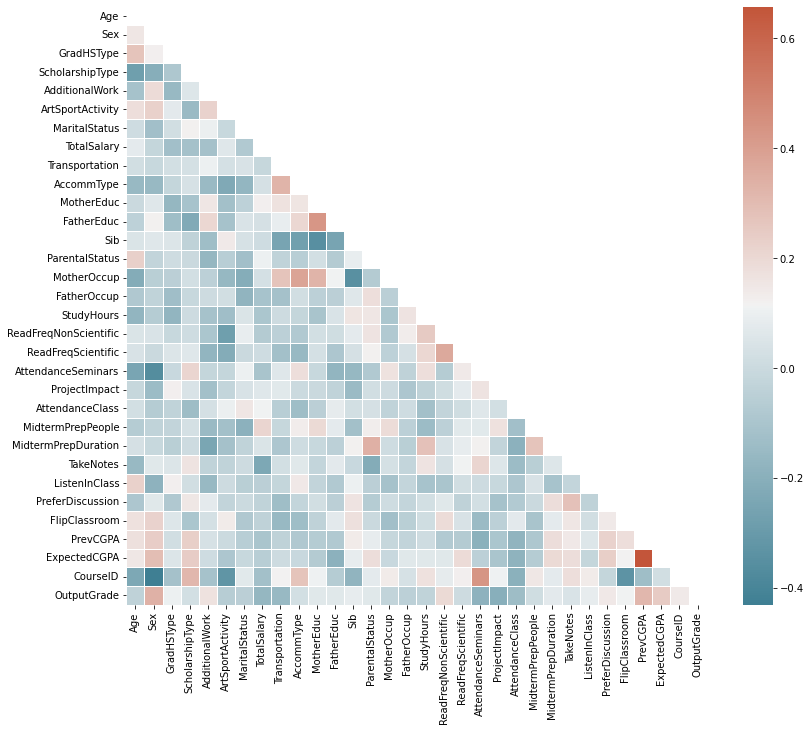

In [15]:
matrix = np.triu(df_feat_target.corr())

fig = plt.figure(figsize = (13,11))
sns.heatmap(df_feat_target.corr(), linecolor = 'white', 
            linewidth = 0.6, 
            cmap = sns.diverging_palette(220, 20, as_cmap=True), 
            mask = matrix, annot = False)
plt.show()

The graphs below illustrate the proportion of students' output grades in the dataset. The distribution of classes is highly imbalanced, with Class 1 constituting 24% of the entire dataset, and Class 0 only accounting for 6% of the dataset. The imbalanced distribution of classes can majorly influence the predictive ability of the Machine Learning model.

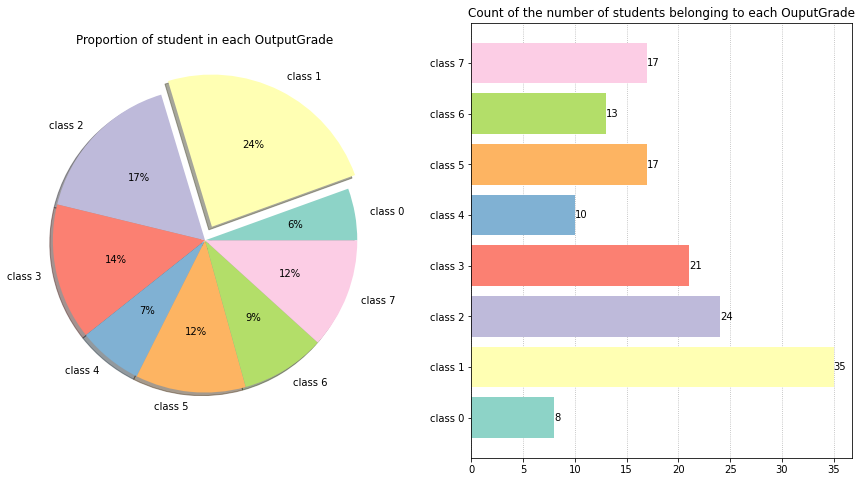

In [16]:
outputgrade_class_count = [len(df_feat_target[df_feat_target['OutputGrade']==x]) for x in sorted(df_target.unique())]
labels = [ 'class '+str(x) for x in sorted(df_target.unique())]
explode = [0, 0.1, 0, 0, 0, 0, 0, 0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8), dpi = 72)
axes[0].pie(outputgrade_class_count, labels = labels, autopct = '%.0f%%', colors = sns.color_palette('Set3'), explode = explode, shadow = True)
axes[0].set_title('Proportion of student in each OutputGrade')

barh_classes = axes[1].barh(y = labels, width = outputgrade_class_count, color = sns.color_palette('Set3'))
axes[1].bar_label(barh_classes)
axes[1].set_title('Count of the number of students belonging to each OuputGrade')
axes[1].set_axisbelow(True)
axes[1].grid(linestyle = ':',axis = 'x')

plt.show()

Additionally, the majority of student information and their family's details collected relate to female students, constituting 60% of the dataset and male student constituting only 40% of the dataset. This suggests that male students are significantly underrepresented in this dataset, potentially impacting the machine learning models' ability to accurately classify male students into the correct classes. The models may acquired more knowledge about female students due to their higher representation in the dataset.

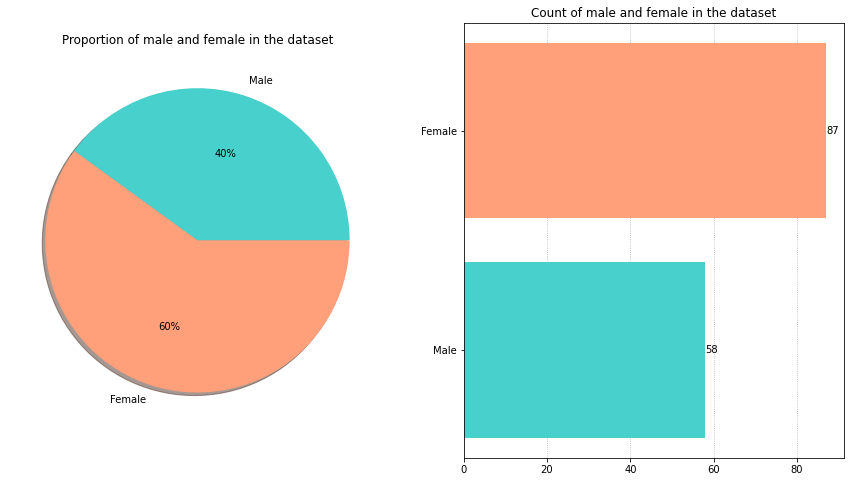

In [17]:
male, female = (df_feat_target['Sex'] == 1).sum(), (df_feat_target['Sex'] == 2).sum()
male_female_proportion = [male, female]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8), dpi = 72)

axes[0].pie(male_female_proportion, labels = ['Male', 'Female'], colors = ['mediumturquoise','lightsalmon'], autopct = '%.0f%%', shadow = True)
axes[0].set_title('Proportion of male and female in the dataset')

barh_male_female = axes[1].barh(y = ['Male','Female'], width = male_female_proportion, color = ['mediumturquoise','lightsalmon'])
axes[1].bar_label(barh_male_female)
axes[1].set_title('Count of male and female in the dataset')
axes[1].set_axisbelow(True)
axes[1].grid(linestyle = ':',axis = 'x')

plt.show()

From this point onward, it must be noted that any visualisations related to the proportion of male and female students may not accurately reflect the real world, given that male students are underrepresented in this dataset.

I aimed to investigate how the general behaviour of students within the classroom, such as their frequency of taking notes and whether or not they listen in class, influences their  performance.

From the snippet of code below, we can observe that 84 students always take notes during the class, 56 students take notes sometimes, and only 5 students say that they never take notes..s

In [18]:
takenotes_count = tuple([(df_feat_target['TakeNotes']==i).sum() for i in sorted(df_feat_target['TakeNotes'].unique(), reverse=True)])
takenotes_labels = ('Always', 'Sometimes', 'Never')
takenotes_zipped = zip(takenotes_labels,takenotes_count)
print(list(takenotes_zipped))

[('Always', 84), ('Sometimes', 56), ('Never', 5)]


Below, we can see that students who claim never to take notes during the class do not appear to score higher than grade CC (class 3). Additionally, there is a higher number of students achieving grade AA (class 7) among those who claim to always take notes in class compared to those who say they do it sometimes. Interestingly, there are more students obtaining grade DD (class 1) when they claim to always take notes than those who say they only do it sometimes.

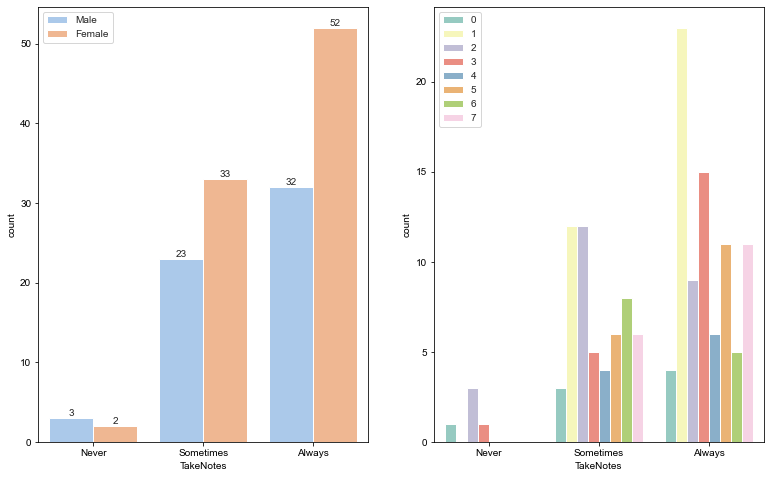

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize = (13,8), dpi = 72)

sns.set_style('whitegrid')

takenotes_sex_bar = sns.countplot(data = df_feat_target, x = 'TakeNotes',hue = 'Sex', palette='pastel' ,ax = axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].bar_label(axes[0].containers[1])
axes[0].legend(labels = ['Male','Female'],loc = 'upper left')
takenotes_sex_bar.set(xticklabels = ['Never', 'Sometimes', 'Always'])

takenotes_outputgrade_bar = sns.countplot(data = df_feat_target, x = 'TakeNotes', hue = 'OutputGrade', palette='Set3', ax = axes[1])
axes[1].legend(loc = 'upper left')
takenotes_outputgrade_bar.set(xticklabels = ['Never', 'Sometimes', 'Always'])
plt.show()

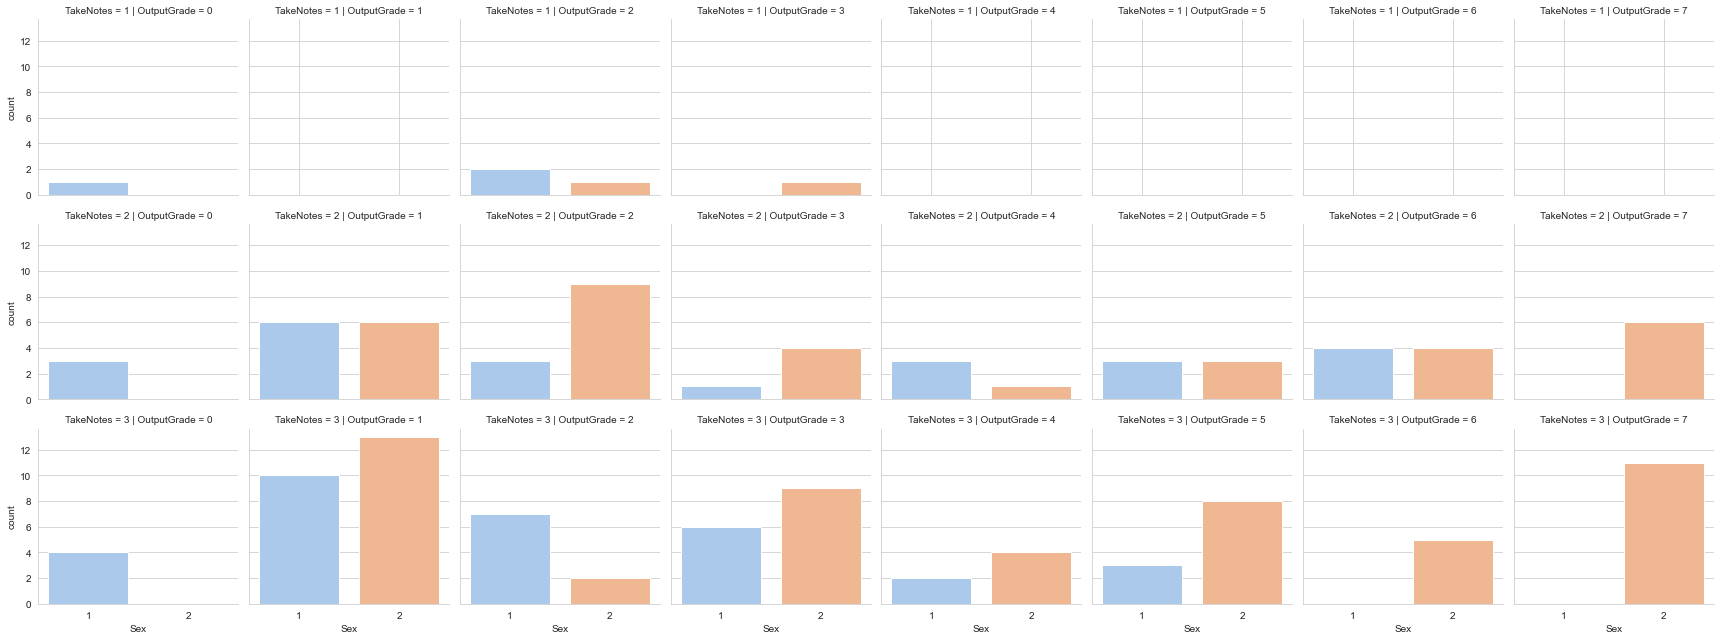

In [20]:
grid = sns.FacetGrid(df_feat_target, col='OutputGrade', row='TakeNotes')
grid.map(sns.countplot,'Sex', palette='pastel',order=sorted([grade for grade in df_feat_target['Sex'].unique()]))
plt.show()

From the snippet of code below, we can observe that 84 students always take notes during the class, 56 students take notes sometimes, and only 5 students say that they never take notes.

In [21]:
listenInClass_count = tuple([(df['ListenInClass']==i).sum() for i in sorted(df_feat_target['ListenInClass'].unique())])
listenInClass_labels = ('Never', 'Sometimes', 'Always')
listenInClass_zipped = zip(listenInClass_labels, listenInClass_count)
print(list(listenInClass_zipped))

[('Never', 29), ('Sometimes', 79), ('Always', 37)]


It is observed that there are fewer students whose output grade is "Fail" when they claim to always listen in class compared to those who say they listen sometimes or never. Additionally, there are more students who obtained grades "CC" and "CB" as they claim they always listen in class. However, this doesn't necessary mean that students who listen in class all the time will obtain the highest grade. This is supported by the visualization of the number of students who claim they listen in class sometimes, where the number of students with grade "AA" is relatively larger than the number of students who obtain the same grade and claim they are always listening.

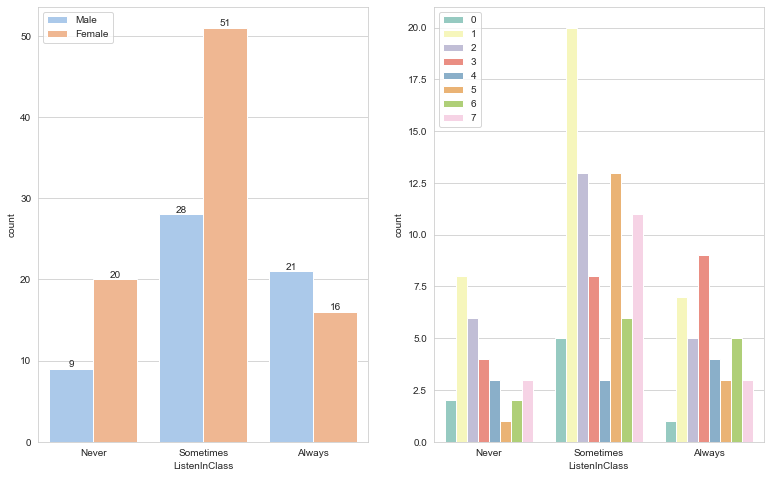

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize = (13,8), dpi = 72)

sns.set_style('whitegrid')

takenotes_sex_bar = sns.countplot(data = df_feat_target, x = 'ListenInClass',hue = 'Sex', palette='pastel' , order=sorted([listen for listen in sorted(df_feat_target['ListenInClass'].unique())]), ax = axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].bar_label(axes[0].containers[1])
axes[0].legend(labels = ['Male','Female'],loc = 'upper left')
takenotes_sex_bar.set(xticklabels = ['Never', 'Sometimes', 'Always'])

takenotes_outputgrade_bar = sns.countplot(data = df_feat_target, x = 'ListenInClass', hue = 'OutputGrade', palette='Set3', order=sorted([listen for listen in sorted(df_feat_target['ListenInClass'].unique())]),ax = axes[1])
axes[1].legend(loc = 'upper left')
takenotes_outputgrade_bar.set(xticklabels = ['Never', 'Sometimes', 'Always'])
plt.show()

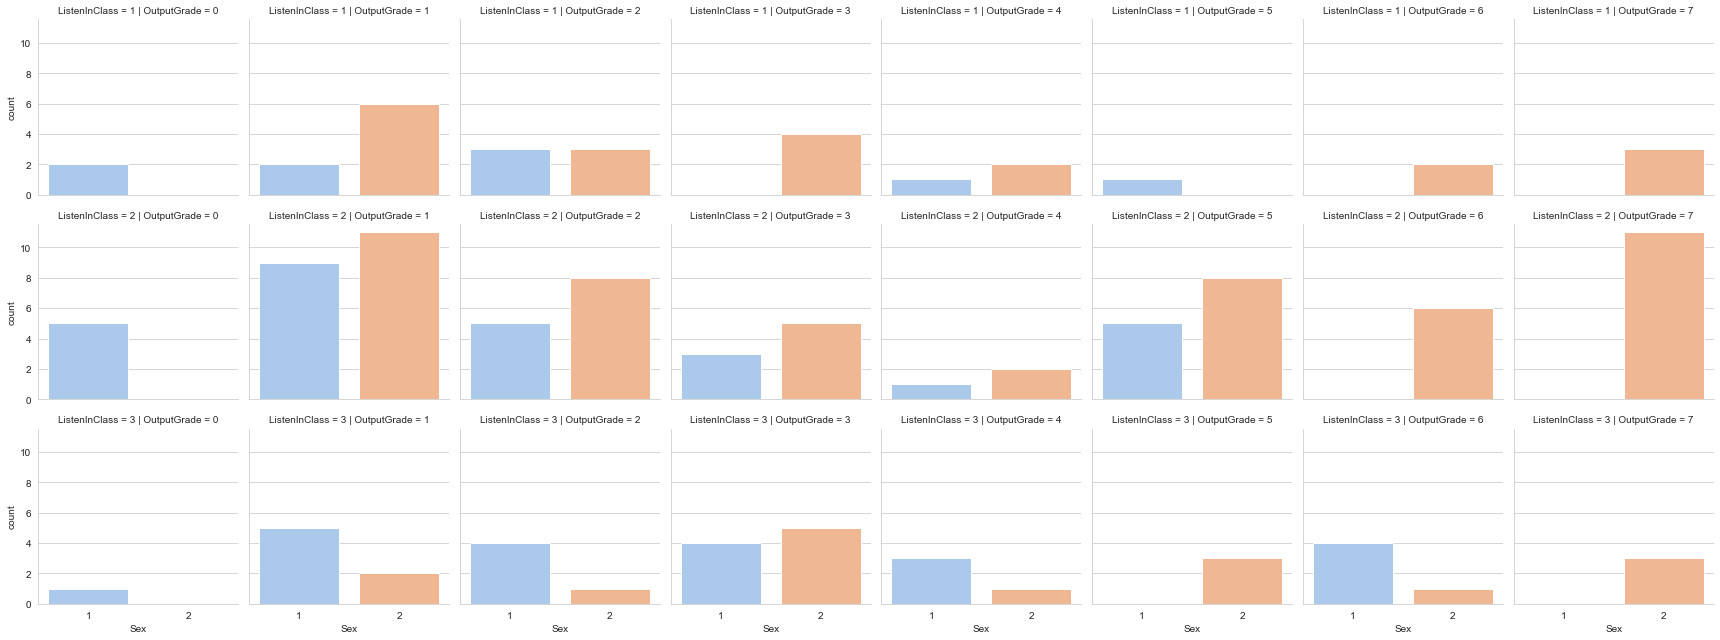

In [23]:
grid = sns.FacetGrid(df_feat_target, col='OutputGrade', row='ListenInClass')
grid.map(sns.countplot,'Sex', palette='pastel',order=sorted([sex for sex in sorted(df_feat_target['Sex'].unique())]))
plt.show()

The bar graph below reveals intriguing information, suggesting that no student is expected to achieve a CGPA above 3.49 (label 5). Furthermore, students whose CGPA was above 3.49 in the previous years did not maintain their grades. There are considerably more students expected to obtain a CGPA of 2.50 (label 3) than the number of students who obtained a CGPA of 2.50 in the previous year. However, it's worth noting that the number of students who obtained CGPA < 2.00 (label 1) and between 2.00-2.49 (label 2) remains the same, implying that those who obtained their previous CGPA above 3.49 are now expected to achieve CGPA between 2.50-2.99 (label 3) and possibly 3.00-3.49 (label 4) only.

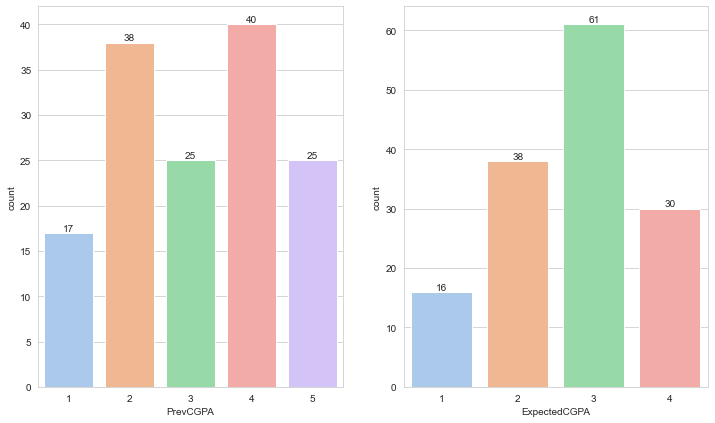

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize = (12,7), dpi = 72)

sns.set_style('whitegrid')
prevcgpa_bar = sns.countplot(data=df_feat_target, x='PrevCGPA', palette='pastel', ax=axes[0])
axes[0].bar_label(axes[0].containers[0])

prevcgpa_bar = sns.countplot(data=df_feat_target, x='ExpectedCGPA', palette='pastel', ax=axes[1])
axes[1].bar_label(axes[1].containers[0])
plt.show()

The visualisation below supports the analysis stated previously.

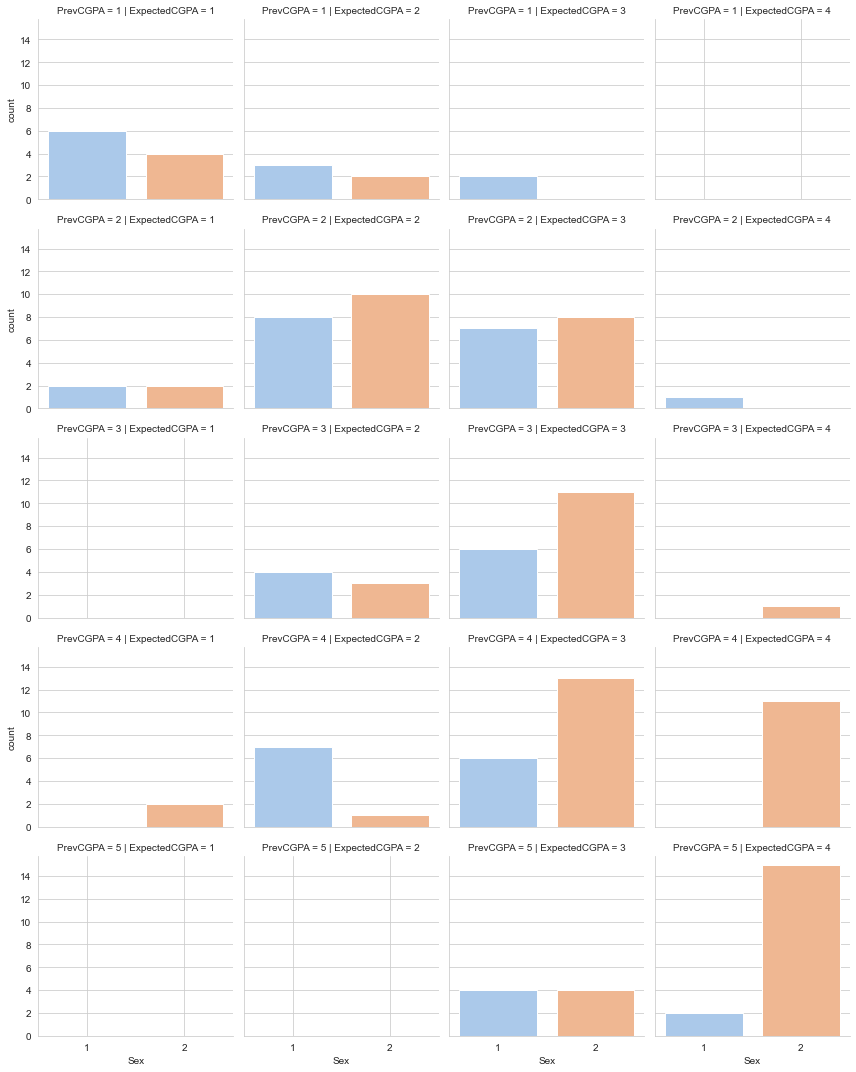

In [25]:
grid = sns.FacetGrid(df_feat_target, col='ExpectedCGPA', row='PrevCGPA')
grid.map(sns.countplot,'Sex',palette='pastel',order=sorted([sex for sex in df_feat_target['Sex'].unique()]))
plt.show()

## Initial model training stage <a name="InitTraining"></a>

<b>RQ1</b>: How are classification models affected by a small dataset with numerous output classes?

For the preliminary phase of model selection and training, I opted for four distinct classification models, including a probabilistic model (Naive Bayes), a tree model (Decision Tree), and ensemble models (Random Forest and Gradient Boosting)

I chose these models based on the nature of the dataset, which primarily consists of categorical data encoded into numerical values.

- Naive Bayes:
     - Suitable for handling categorical data and is particularly effective when dealing with discrete features.
     - Known for its simplicity. (Ray, 2019)
     - Assumes that the features contribute the the classification of the classes independently. (Ray, 2019)
- Decision Tree:
     - It is easy to comprehend. (Castillo, 2021)
     - Widely used as a way of representing the decision-making process. (Castillo, 2021)
     - Capable at capturing non-linear relationships in the data, making them suitable for datasets with categorical attributes. (R, n.d.)
- Random Forest and Gradient Boosting:
     - Ensemble methods that excel in improving predictive accuracy by combining the strengths of multiple models, which proves beneficial in handling complex categorical datasets. (Alhamid, 2021)

Below are user-defined utility functions that I have written to provide reusability and minimise both the number of lines and redundancy.

In [28]:
def train_test_CategoricalNB(x_train, x_test, y_train, y_test):
    cnb = CategoricalNB(min_categories=2)
    cnb.fit(x_train,y_train)
    y_pred_cnb = cnb.predict(x_test)

    return y_pred_cnb

In [29]:
def train_test_DecisionTreeClassifier(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier(criterion='entropy', max_features=None, max_depth=None, splitter='random', random_state=42)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)

    return y_pred_dt

In [30]:
def train_test_RandomForestClassifier(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(criterion='entropy', max_features=None, random_state=42)
    rf.fit(x_train, y_train)
    y_pred_rf = rf.predict(x_test)

    return y_pred_rf

In [31]:
def train_test_GradientBoostingClassifier(x_train, x_test, y_train, y_test):
    gbc = GradientBoostingClassifier(n_estimators=25, learning_rate = 0.1, random_state=42)
    gbc.fit(x_train,y_train)
    y_pred_gbc = gbc.predict(x_test)

    return y_pred_gbc

In [32]:
def confusion_matrix_4_models(y_test,*y_pred):
    fig, axes = plt.subplots(figsize=(12,10), nrows=2, ncols=2)

    cm_cnb = confusion_matrix(y_test, y_pred[0])
    cm_dt = confusion_matrix(y_test, y_pred[1])
    cm_rf = confusion_matrix(y_test, y_pred[2])
    cm_gbc = confusion_matrix(y_test, y_pred[3])

    sns.heatmap(cm_cnb, annot = True, cmap = 'YlGnBu', ax=axes[0][0])
    axes[0][0].set_title('Categorical Naive Bayes')

    sns.heatmap(cm_dt, annot = True, cmap = 'YlGnBu', ax=axes[0][1])
    axes[0][1].set_title('Decision Tree')

    sns.heatmap(cm_rf, annot = True, cmap = 'YlGnBu', ax=axes[1][0])
    axes[1][0].set_title('Random Forest')

    sns.heatmap(cm_gbc, annot = True, cmap = 'YlGnBu', ax=axes[1][1])
    axes[1][1].set_title('Gradient Boosting')

    plt.show()

In [33]:
def print_performance_report(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print('-------------------------------------------------------')

### Splitting the data into training and testing <a name="InitSplit"></a>

'df_features_baseline' is a data frame comprising all the features (excluding the student ID) within the dataset. This will serve as our "controlled" dataset for experimenting and comparing the results of the models throughout this exploration.

In [34]:
df_features_baseline = df_features

x = df_features_baseline
y = df_target

The data is being divided into an 80% training set and a 20% testing set, consistently utilizing a random_state of 42 across the entire experiment. This ensures that the models are trained and tested on consistent data sets, avoiding randomization. Additionally, the stratify parameter is set to 'y' to uphold the proportions of the original dataset, addressing the significant imbalance in our data.

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

### Training & Evaluating the models with confusion matrix <a name="TrainEval"></a>

#### Categorical Naive Bayes, Decision Tree, Random Forest & Gradient Boosting <a name="First4Models"></a>

In [36]:
y_pred_cnb = train_test_CategoricalNB(x_train, x_test, y_train, y_test)
y_pred_dt = train_test_DecisionTreeClassifier(x_train, x_test, y_train, y_test)
y_pred_rf = train_test_RandomForestClassifier(x_train, x_test, y_train, y_test)
y_pred_gbc = train_test_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

#### Classification report <a name="InitCR"></a>

Given the substantial imbalance in our dataset, where one class significantly outnumbers the others, relying solely on accuracy may not offer an accurate reflection of model performance. The weighted F1 score, by considering the contribution of each class, proves to be more robust in such situations.

In [37]:
print('Categorical Naive Bayes')
print_performance_report(y_test, y_pred_cnb)
print('Decision Tree - ID3')
print_performance_report(y_test, y_pred_dt)
print('Random Forest')
print_performance_report(y_test, y_pred_rf)
print('Gradient Boosting')
print_performance_report(y_test, y_pred_gbc)

Categorical Naive Bayes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.31      0.71      0.43         7
           2       0.50      0.20      0.29         5
           3       0.50      0.75      0.60         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.33      0.33      0.33         3
           7       1.00      0.33      0.50         3

    accuracy                           0.38        29
   macro avg       0.33      0.29      0.27        29
weighted avg       0.37      0.38      0.32        29

-------------------------------------------------------
Decision Tree - ID3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.17      0.14      0.15         7
           2       0.00      0.00      0.00         5
           3       0.25      0.2

#### Confusion matrix <a name="InitCM"></a>

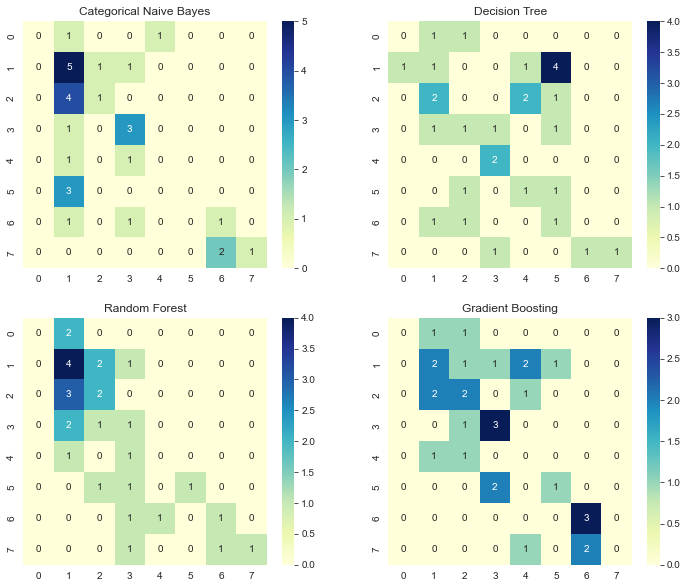

In [38]:
confusion_matrix_4_models(y_test, y_pred_cnb, y_pred_dt, y_pred_rf, y_pred_gbc)

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|<b>Categorical Naive Bayes|<b>0.38|<b>0.37|<b>0.38|<b>0.32|
|Decision Tree - ID3    |0.14|0.19|0.14|0.14|
|Random Forest          |0.28|0.18|0.28|0.22|
|Gradient Boosting      |0.31|0.26|0.31|0.28|

\

It is observed that the Categorical Naive Bayes outperforms the rest of the selected models

## Feature selection <a name="FeatSelect"></a>

### Model Training with the one-hot encoded data (All features are used) <a name="TrainOHE"></a>

<b>RQ2</b>: Does One-Hot Encoding directly impact the performance of the chosen models?

#### Defining the columns to be One-Hot Encoded <a name="DefineOHECol"></a>

In the dataset, all the information is categorised but is expressed in numerical values. However, several of these representations lack meaningful interpretation when confined to a finite range of numbers, e.g., "Sex", "GradHSType", "ParentalStatus", etc. In contrast, there are instances where the data logically fits within a finite range, representing some form of order (ordinal data).
\
\
Therefore, I have chosen to apply one-hot encoding specifically to the nominal features within the dataset.

In [39]:
to_one_hot_encode_cols = ['Sex','GradHSType','AdditionalWork','ArtSportActivity','MaritalStatus',
                        'Transportation','AccommType','ParentalStatus','MotherOccup','FatherOccup',
                        'AttendanceSeminars','ProjectImpact','MidtermPrepPeople','FlipClassroom']

In [40]:
df_features_baseline_col_OHE = pd.get_dummies(data = df_features_baseline, columns = to_one_hot_encode_cols)

In [41]:
x = df_features_baseline_col_OHE
y = df_target

#### Splitting the data <a name="OHESplit"></a>

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

#### Training Categorical Naive Bayes, Decision Tree, Random Forest & Gradient Boosting <a name="OHEModelTraining"></a>

In [43]:
y_pred_cnb = train_test_CategoricalNB(x_train, x_test, y_train, y_test)
y_pred_dt = train_test_DecisionTreeClassifier(x_train, x_test, y_train, y_test)
y_pred_rf = train_test_RandomForestClassifier(x_train, x_test, y_train, y_test)
y_pred_rf = train_test_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

#### Performance Evaluation <a name="OHEPerformanceEval"></a>

##### Classification report <a name="OHECR"></a>

In [44]:
print('Categorical Naive Bayes')
print_performance_report(y_test, y_pred_cnb)
print('Decision Tree - ID3')
print_performance_report(y_test, y_pred_dt)
print('Random Forest')
print_performance_report(y_test, y_pred_rf)
print('Gradient Boosting')
print_performance_report(y_test, y_pred_gbc)

Categorical Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.36      0.57      0.44         7
           2       0.33      0.20      0.25         5
           3       0.40      0.50      0.44         4
           4       0.00      0.00      0.00         2
           5       0.33      0.33      0.33         3
           6       0.33      0.33      0.33         3
           7       1.00      0.33      0.50         3

    accuracy                           0.38        29
   macro avg       0.47      0.35      0.37        29
weighted avg       0.44      0.38      0.38        29

-------------------------------------------------------
Decision Tree - ID3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.12      0.20      0.15         5
           3       0.00      0.0

##### Confusion matrix <a name="OHECM"></a>

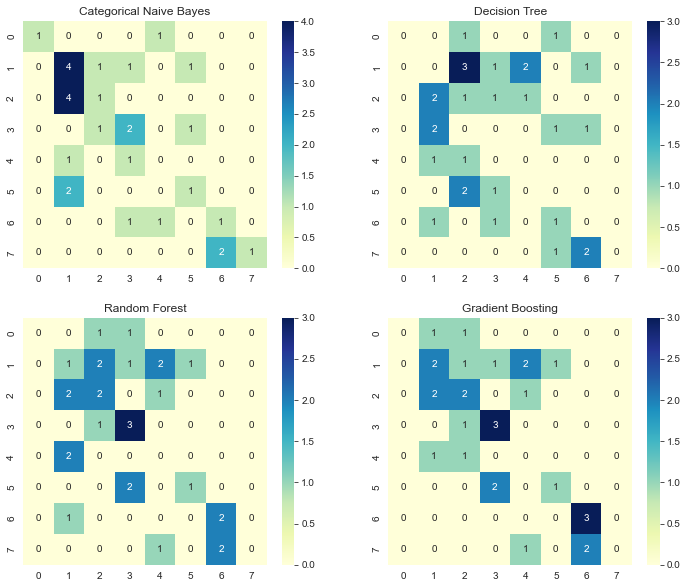

In [45]:
confusion_matrix_4_models(y_test, y_pred_cnb, y_pred_dt, y_pred_rf, y_pred_gbc)

Below are the predictive performances of the 4 selected model on the controlled dataset ('df_features_baseline'):

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Categorical Naive Bayes|0.38|0.37|0.38|0.32|
|Decision Tree - ID3    |0.14|0.19|0.14|0.14|
|Random Forest          |0.28|0.18|0.28|0.22|
|Gradient Boosting      |0.38|0.32|0.38|0.34|

Below are the predictive performances of the same 4 model on One-Hot encoded dataset ('df_features_baseline_col_OHE'):

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|<b>Categorical Naive Bayes</b>|0.38|<b>0.44</b>|0.38|<b>0.38</b>|
|Decision Tree - ID3    |0.03|0.02|0.03|0.03|
|Random Forest          |0.21|0.16|0.21|0.18|
|Gradient Boosting      |0.31|0.26|0.31|0.28|

\
\
As observed, in most cases, the performance of the models decreases, including Random Forest, Gradient Boosting, and Decision Tree, which perform significantly worse than before. This is likely associated with the increased number of features, many of which have values of only 0 and 1 after certain features have been one-hot encoded. This could potentially introduce ambiguity for the model in identifying the features with the highest gain for the internal nodes within the tree.
\
\
However, it can be observed that the weighted precision and weighted F1 score have increased for the Categorical Naive Bayes model. The improvement in weighted precision and weighted F1 score for the Categorical Naive Bayes model after one-hot encoding the data can be attributed to the nature of Naive Bayes algorithms. Naive Bayes assumes independence between features, and when the data is one-hot encoded, it transforms categorical variables into a binary format, aligning well with the independence assumption.

### Model Training with binary-transformed dataset (All features are used) <a name="BinaryTransform"></a>

In this section, I aim to delve deeper into one of the research questions proposed for further exploration:
- <b>RQ1</b>: How are classification models affected by a small dataset with numerous output classes?

The initial performance evaluation indicate that the chosen models exhibit less-than-ideal performance, particularly given the constraints of a small dataset with numerous distinct classes. This led me to consider whether I could enhance the overall predictive performance of the models by reducing the number of distinct classes. This methodology was investigated in the work of B. Jothi and M. Pushpalatha, where they categorised the OutputGrade into binary and ternary classifications. (B. Jothi and M. Pushpalatha, 2022)

#### Transforming the output variable from multi-class to binary class <a name="MultiToBinary"></a>

Here, I will adopt a similar methodology, focusing solely on binary classification. Specifically, students whose grades fall between "Fail" and "CC" will be categorised as 0, while those with grades above "CC" will be categorised as 1.

In [46]:
df_feat_target_binary = df_feat_target.copy()

In [47]:
lower_bound_grade = sorted(df_feat_target_binary['OutputGrade'].unique())[:len(df_feat_target_binary['OutputGrade'].unique())//2]

In [48]:
for i in range(len(df_feat_target_binary)):
    if df_feat_target_binary.iloc[i,:]['OutputGrade'] in lower_bound_grade:
        df_feat_target_binary.iloc[i,:]['OutputGrade'] = int(0)
    else:
        df_feat_target_binary.iloc[i,:]['OutputGrade'] = int(1)

#### Splitting the data and training <a name="BinarySplit"></a>

In [49]:
x = df_feat_target_binary.drop(columns = ['OutputGrade'])
y = df_feat_target_binary['OutputGrade']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

#### Training Categorical Naive Bayes, Decision Tree, Random Forest & Gradient Boosting <a name="BinaryTraining"></a>

In [51]:
y_pred_cnb = train_test_CategoricalNB(x_train, x_test, y_train, y_test)
y_pred_dt = train_test_DecisionTreeClassifier(x_train, x_test, y_train, y_test)
y_pred_rf = train_test_RandomForestClassifier(x_train, x_test, y_train, y_test)
y_pred_gbc = train_test_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

#### Performance Evaluation <a name="BinaryPerformanceEval"></a>

##### Classification report <a name="BinaryCR"></a>

In [52]:
print('Categorical Naive Bayes')
print_performance_report(y_test, y_pred_cnb)
print('Decision Tree - ID3')
print_performance_report(y_test, y_pred_dt)
print('Random Forest')
print_performance_report(y_test, y_pred_rf)
print('Gradient Boosting')
print_performance_report(y_test, y_pred_gbc)

Categorical Naive Bayes
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.36      0.53        11

    accuracy                           0.76        29
   macro avg       0.86      0.68      0.69        29
weighted avg       0.83      0.76      0.72        29

-------------------------------------------------------
Decision Tree - ID3
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.73      0.73      0.73        11

    accuracy                           0.79        29
   macro avg       0.78      0.78      0.78        29
weighted avg       0.79      0.79      0.79        29

-------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.89      0.73      0.80        11

    accuracy

##### Confusion matrix <a name="BinaryCM"></a>

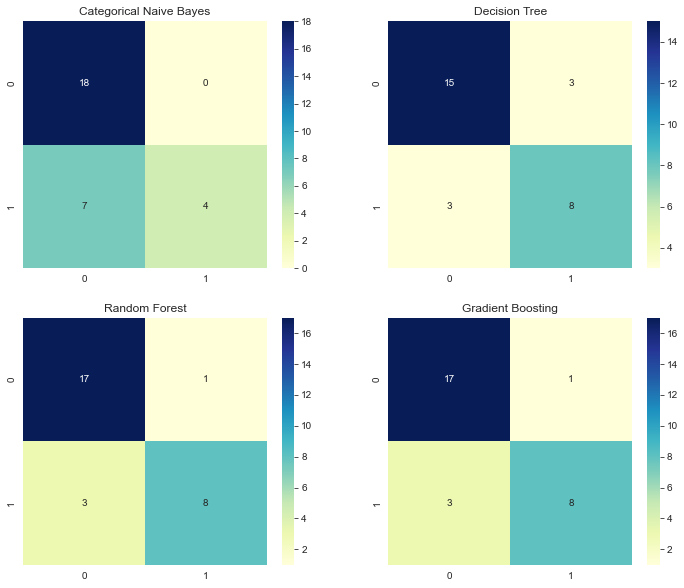

In [53]:
confusion_matrix_4_models(y_test, y_pred_cnb, y_pred_dt, y_pred_rf, y_pred_gbc)

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Categorical Naive Bayes|0.76|0.83|0.76|0.72|
|Decision Tree - ID3    |0.79|0.79|0.79|0.79|
|<b>Random Forest       |<b>0.86|<b>0.86|<b>0.86|<b>0.86|
|<b>Gradient Boosting   |<b>0.86|<b>0.86|<b>0.86|<b>0.86|
    
From the table above, it is evident that the performances of our models have shown a significant improvement compared to the observations made earlier. Random Forest and Gradient Boosting, in particular, achieved the highest scores across all metrics.
\
\
Nevertheless, despite the substantial increase in performance, there is a notable loss of granularity in the data. This approach may not be suitable if educators aim to precisely assess the extent of improvement in students' performance over time.
\
\
However, this approach would be appropriate if educators aim to ensure that all their students achieve grades well above the average ("CB," "BB," "BA," and "AA"), with the goal of preventing any student from failing and promoting overall satisfactory performance.

##### ROC-AUC Score <a name="BinaryROC"></a>

In [54]:
def print_roc_auc_score(y_test,y_prob_rf,y_prob_gbc):
    roc_auc_score_rf = roc_auc_score(y_test,y_prob_rf[:, 1])
    roc_auc_score_gbc = roc_auc_score(y_test,y_prob_gbc[:, 1])

    print('ROC-AUC Score(Random Forest):',round(roc_auc_score_rf,3))
    print('ROC-AUC Score(Gradient Boosting):',round(roc_auc_score_gbc,3))

In [55]:
def train_test_proba_RandomForestClassifier(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(criterion='entropy', max_features=None, random_state=42)
    rf.fit(x_train, y_train)
    y_prob_rf = rf.predict_proba(x_test)

    return y_prob_rf

In [56]:
def train_test_proba_GradientBoostingClassifier(x_train, x_test, y_train, y_test):
    gbc = GradientBoostingClassifier(n_estimators=25, learning_rate = 0.1, random_state=42)
    gbc.fit(x_train,y_train)
    y_prob_gbc = gbc.predict_proba(x_test)

    return y_prob_gbc

In [57]:
y_prob_rf = train_test_proba_RandomForestClassifier(x_train, x_test, y_train, y_test)
y_prob_gbc = train_test_proba_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

In [58]:
print_roc_auc_score(y_test, y_prob_rf, y_prob_gbc)

ROC-AUC Score(Random Forest): 0.902
ROC-AUC Score(Gradient Boosting): 0.899


|         Model         | ROC-AUC Score |
|:----------------------|:-------------:|
|<b>Random Forest       |<b>0.902|
|Gradient Boosting      |0.899|
\


The ROC-AUC scores indicates that the Random Forest and Gradient Boosting model has a relatively high ability to distinguish between positive and negative classes, with an area under the ROC curve of 0.902 and 0.899 respecitvely. Both models exhibit good performance in terms of distinguishing between the classes, with the Random Forest model slightly outperforming the Gradient Boosting model

## Model Training with binary-transformed + intuitively dropping features dataset <a name="BinaryIntuitive"></a>

In this section, I chose to investigate the impact on the performances of Random Forest and Gradient Boosting models by intuitively dropping columns that, in my judgment, may not contribute significantly to student performance in the real world.

#### Defining the columns to be dropped intuitively <a name="BinaryIntuitiveDef"></a>

In [59]:
to_drop_cols = ['MaritalStatus', 'TotalSalary', 'Transportation', 'AccommType', 'MotherEduc',
                'FatherEduc', 'Sib', 'ParentalStatus', 'MotherOccup', 'FatherOccup',
                'PreferDiscussion', 'FlipClassroom']

In [60]:
df_features_intuitive_drop = df_feat_target_binary.drop(columns = to_drop_cols)

#### Splitting the data <a name="BinaryIntuitiveSplit"></a>

In [61]:
x = df_features_intuitive_drop.drop(columns=['OutputGrade'])
y = df_features_intuitive_drop['OutputGrade']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

#### Training Random Forest and Gradient Boosting <a name="BinaryIntuitiveTraining"></a>

In [63]:
y_pred_rf = train_test_RandomForestClassifier(x_train, x_test, y_train, y_test)

In [64]:
y_pred_gbc = train_test_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

#### Performance Evaluation <a name="BinaryIntuitivePerformanceEval"></a>

##### Classification report <a name="BinaryIntuitiveCR"></a>

In [65]:
print('Random Forest')
print_performance_report(y_test, y_pred_rf)
print('Gradient Boosting')
print_performance_report(y_test, y_pred_gbc)

Random Forest
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.88      0.64      0.74        11

    accuracy                           0.83        29
   macro avg       0.84      0.79      0.80        29
weighted avg       0.83      0.83      0.82        29

-------------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.88      0.64      0.74        11

    accuracy                           0.83        29
   macro avg       0.84      0.79      0.80        29
weighted avg       0.83      0.83      0.82        29

-------------------------------------------------------


##### Confusion matrix <a name="BinaryIntuitiveCM"></a>

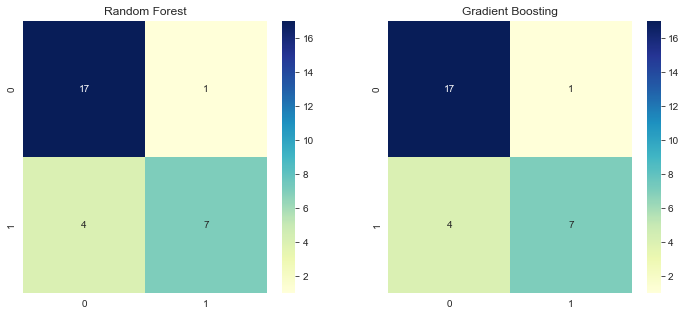

In [66]:
fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

sns.heatmap(cm_rf, annot = True, cmap = 'YlGnBu', ax=axes[0])
axes[0].set_title('Random Forest')

sns.heatmap(cm_gbc, annot = True, cmap = 'YlGnBu', ax=axes[1])
axes[1].set_title('Gradient Boosting')

plt.show()

##### ROC-AUC Score <a name="BinaryIntuitiveROC"></a>

In [67]:
y_prob_rf = train_test_proba_RandomForestClassifier(x_train, x_test, y_train, y_test)
y_prob_rf = train_test_proba_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

In [68]:
print_roc_auc_score(y_test, y_prob_rf, y_prob_gbc)

ROC-AUC Score(Random Forest): 0.934
ROC-AUC Score(Gradient Boosting): 0.899


|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Random Forest (Trained with features intuitively selected)       |0.83|0.83|0.83|0.82|
|<b>Random Forest (Trained with all features)       |<b>0.86|<b>0.86|<b>0.86|<b>0.86|
|Gradient Boosting (Trained with features intuitively selected)  |0.83|0.83|0.83|0.82|
|<b>Gradient Boosting (Trained with all features)  |<b>0.86|<b>0.86|<b>0.86|<b>0.86|    



|         Model         | ROC-AUC Score (All features) | ROC-AUC Score (intuitively dropping features) |
|:----------------------|:---------------------------------------------:|:---------------------------------------------:|
|Random Forest          |0.902|<b>0.934|
|Gradient Boosting      |0.899|<b>0.937|

Interestingly, the model performances are nearly identical across all performance metrics, including the ROC-AUC score, with minor differences. Although the accuracy, weighted precision, weighted recall, and weighted F1 score are slightly lower compared to when the models were trained using all features of the binary-transformed dataset, the ROC-AUC score seems to have increased. This suggests that applying the models on the data frame where certain features were intuitively dropped resulted in a slight improvement in terms of distinguishing between the classes.

### Training the models with highly correlated features <a name="HighCorrFeat"></a>

<b>RQ3</b>: How do highly correlated features affect model performance?

I aimed to investigate how highly correlated features impact the performance of Random Forest and Gradient Boosting. My assumption is that features exhibiting high correlation with each other would significantly contribute to making accurate predictions.
\
\
I have selected a threshold of 0.40 to determine which features are classified as highly correlated. Features with a correlation coefficient below this threshold are considered to have low correlation.

#### Identifying the columns that are highly correlated <a name="HighCorrFeatDef"></a>

With the specified threshold, seven features were identified from the dataset, and these features were used to train the models and subsequently evaluated. The selected features include 'PrevCGPA', 'AttendanceSeminars', 'ExpectedCGPA', 'CourseID', 'FatherEduc', 'MotherEduc', and 'Sex'


2 / 2







In [69]:
corr_threshold = 0.40
high_corr_feats = set()

series_feat_corr = df_features.corr().abs().unstack()
series_feat_corr_ordered = series_feat_corr.sort_values(kind = 'quicksort')

for i in range(len(series_feat_corr_ordered)):
    if round(series_feat_corr_ordered[i], 2) < corr_threshold:
        continue
    elif round(series_feat_corr_ordered[i], 2) == 1:
        continue
    else:
        high_corr_feats.add(series_feat_corr_ordered.index[i][0])

print(high_corr_feats)

{'CourseID', 'FatherEduc', 'MotherEduc', 'Sex', 'ExpectedCGPA', 'AttendanceSeminars', 'PrevCGPA'}


#### Splitting the data <a name="HighCorrFeatSplit"></a>

In [70]:
df_features_high_corr = df_feat_target_binary.loc[:,list(high_corr_feats)]

In [71]:
x = df_features_high_corr
y = df_feat_target_binary['OutputGrade']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

#### Training Random Forest and Gradient Boosting <a name="HighCorrFeatTraining"></a>

In [73]:
y_pred_rf = train_test_RandomForestClassifier(x_train, x_test, y_train, y_test)

In [74]:
y_pred_gbc = train_test_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

#### Performance Evaluation <a name="HighCorrFeatPerformanceEval"></a>

##### Classification report <a name="HighCorrFeatCR"></a>

In [75]:
print('Random Forest')
print_performance_report(y_test, y_pred_rf)
print('Gradient Boosting')
print_performance_report(y_test, y_pred_gbc)

Random Forest
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.88      0.89        29
weighted avg       0.90      0.90      0.90        29

-------------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.73      0.84        11

    accuracy                           0.90        29
   macro avg       0.93      0.86      0.88        29
weighted avg       0.91      0.90      0.89        29

-------------------------------------------------------


##### Confusion matrix <a name="HighCorrFeatCM"></a>

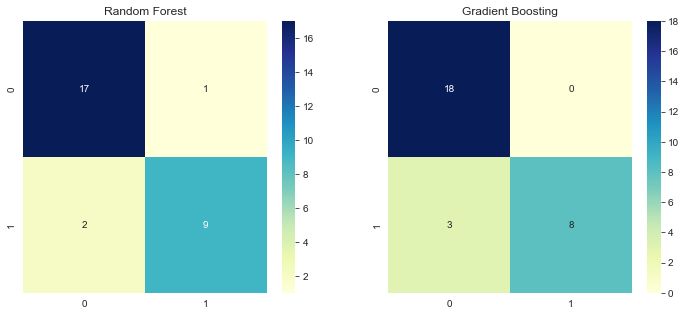

In [76]:
fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

sns.heatmap(cm_rf, annot = True, cmap = 'YlGnBu', ax=axes[0])
axes[0].set_title('Random Forest')

sns.heatmap(cm_gbc, annot = True, cmap = 'YlGnBu', ax=axes[1])
axes[1].set_title('Gradient Boosting')

plt.show()

##### ROC-AUC Score <a name="HighCorrFeatROC"></a>

In [77]:
y_prob_rf = train_test_proba_RandomForestClassifier(x_train, x_test, y_train, y_test)
y_prob_rf = train_test_proba_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

In [78]:
print_roc_auc_score(y_test, y_prob_rf, y_prob_gbc)

ROC-AUC Score(Random Forest): 0.937
ROC-AUC Score(Gradient Boosting): 0.899


Performances of the models trained using highly correlated features:

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Random Forest (Highly correlated features)      |0.90|0.90|0.90|<b>0.90|
|Gradient Boosting (Highly correlated features   |0.90|<b>0.91|0.90|0.89|


    
|         Model         | ROC-AUC Score |
|:----------------------|:-------------:|
|Random Forest          |<b>0.937|
|Gradient Boosting      |0.899|

\
Using highly correlated data to train the model resulted in an improvement in the performance of the Gradient Boosting model compared to intuitively dropping features from the dataset. Additionally, there was an observed increase in the weighted F1 score for the Random Forest model as well as a slight improvement in the ROC-AUC score.

\
Highly correlated features may be interacting in a way that positively influences the models' ability to capture complex relationships within the dataset. Ensemble models, epecially, can exploit how feature interacts with each other to improve performance. Additionally, Random Forest and Gradient Boosting implemented in this experiment, possess greater robustness in handling correlated features.

\
The noted improvement might also be attributed to randomness in the data-splitting process during training and testing. Different splits can also yield different outcomes, and occasionally, the inclusion of correlated features may align with a more favorable split, resulting in improved performance.



### Training the models features that have low correlation <a name="LowCorrFeat"></a>

#### Identifying the features that have low correlation <a name="LowCorrFeatDef"></a>

Alternatively, I aim to examine the impact on Random Forest and Gradient Boosting models when trained with features exhibiting low correlation.


To extract features with low correlation, it is a straightforward process of removing the features that were identified as highly correlated in the previous stage.

In [79]:
df_features_low_corr = df_feat_target_binary.drop(columns = list(high_corr_feats))

#### Splitting the data <a name="LowCorrFeatSplit"></a>

In [80]:
x = df_features_low_corr.drop(columns=['OutputGrade'])
y = df_features_low_corr['OutputGrade']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

#### Training Random Forest and Gradient Boosting <a name="LowCorrFeatTraining"></a>

In [82]:
y_pred_rf = train_test_RandomForestClassifier(x_train, x_test, y_train, y_test)

In [83]:
y_pred_gbc = train_test_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

#### Performance Evaluation <a name="LowCorrFeatPerformanceEval"></a>

##### Classification report <a name="LowCorrFeatCR"></a>

In [84]:
print('Random Forest')
print_performance_report(y_test, y_pred_rf)
print('Gradient Boosting')
print_performance_report(y_test, y_pred_gbc)

Random Forest
              precision    recall  f1-score   support

           0       0.58      0.61      0.59        18
           1       0.30      0.27      0.29        11

    accuracy                           0.48        29
   macro avg       0.44      0.44      0.44        29
weighted avg       0.47      0.48      0.48        29

-------------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.50      0.55      0.52        11

    accuracy                           0.62        29
   macro avg       0.60      0.61      0.60        29
weighted avg       0.63      0.62      0.62        29

-------------------------------------------------------


##### Confusion matrix <a name="LowCorrFeatCM"></a>

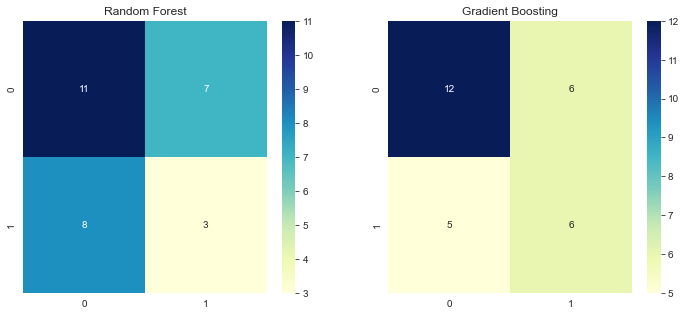

In [85]:
fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

sns.heatmap(cm_rf, annot = True, cmap = 'YlGnBu', ax=axes[0])
axes[0].set_title('Random Forest')

sns.heatmap(cm_gbc, annot = True, cmap = 'YlGnBu', ax=axes[1])
axes[1].set_title('Gradient Boosting')

plt.show()

##### ROC-AUC Score <a name="LowCorrFeatROC"></a>

In [86]:
y_prob_rf = train_test_proba_RandomForestClassifier(x_train, x_test, y_train, y_test)
y_prob_gbc = train_test_proba_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

In [87]:
print_roc_auc_score(y_test, y_prob_rf, y_prob_gbc)

ROC-AUC Score(Random Forest): 0.497
ROC-AUC Score(Gradient Boosting): 0.563


|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Random Forest (Low correlated features)       |0.48|0.47|0.48|0.48|
|<b>Gradient Boosting (Low correlated features)  |<b>0.62|<b>0.63|<b>0.62|<b>0.62|



|         Model         | ROC-AUC Score |
|:----------------------|:-------------:|
|Random Forest          |0.497|
|<b>Gradient Boosting      |<b>0.563|



It is evident that the predictive performance of the models significantly declines when trained with features exhibiting low correlation among themselves. The model seems to have difficulties in distinguishing between class 0 and class 1, as indicated by both the lower ROC-AUC score and the confusion matrix. Yet, Gradient Boosting demonstrates better performance compared to Random Forest when trained with features yielding low correlation in terms of the overall performance.

### Feature Importance - Random Forest Approach <a name="FeatureImportance"></a>

<b>RQ4</b>: Is feature importance a superior approach to feature selection compared to the correlation coefficient?

Finally, the feature selection approach I aim to explore is based on feature importance. In this case, I will utilize the random forest feature importance method to select features in decrements of 5%, starting from the top 70% down to the top 45%. A higher feature importance value indicates a more significant contribution of the feature to the classification performance of the model.

In the end, I will compare the effectiveness of each feature selection approach to answer my proposed research question and proceed with the most effective method.

In [88]:
x = df_feat_target_binary.drop(columns = ['OutputGrade'])
y = df_feat_target_binary['OutputGrade']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [89]:
rf = RandomForestClassifier(criterion='entropy', max_features=None, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

importances = rf.feature_importances_

In [90]:
feat_importance = zip(df_feat_target_binary.drop(columns=['OutputGrade']).columns,importances)
feat_importance = sorted(feat_importance, reverse = True ,key = lambda x: x[1])

In [91]:
feat_importance

[('CourseID', 0.39527543704954565),
 ('PrevCGPA', 0.08413155541164502),
 ('ArtSportActivity', 0.050604666126478806),
 ('Sib', 0.03862277759366981),
 ('TotalSalary', 0.034780981628661604),
 ('FatherOccup', 0.031584720448282116),
 ('StudyHours', 0.03138136400104697),
 ('Transportation', 0.031113088383346744),
 ('ListenInClass', 0.028245878750705236),
 ('Age', 0.02693804992897147),
 ('AccommType', 0.021269966216728345),
 ('MaritalStatus', 0.021043289763096308),
 ('ProjectImpact', 0.01878175745496474),
 ('GradHSType', 0.018639347094629884),
 ('ExpectedCGPA', 0.018467672616465015),
 ('FlipClassroom', 0.015373754022141084),
 ('ReadFreqNonScientific', 0.014628210669920351),
 ('ScholarshipType', 0.014022182950235808),
 ('MidtermPrepPeople', 0.013622842082164117),
 ('FatherEduc', 0.012939922245520088),
 ('Sex', 0.012426000979470381),
 ('PreferDiscussion', 0.012195607591309691),
 ('MotherEduc', 0.011243672096245532),
 ('MotherOccup', 0.007201012904528113),
 ('ParentalStatus', 0.00711600786704728

Below, it is evident that 'CourseID' holds the highest feature importance value, followed by PrevCGPA, and so on.

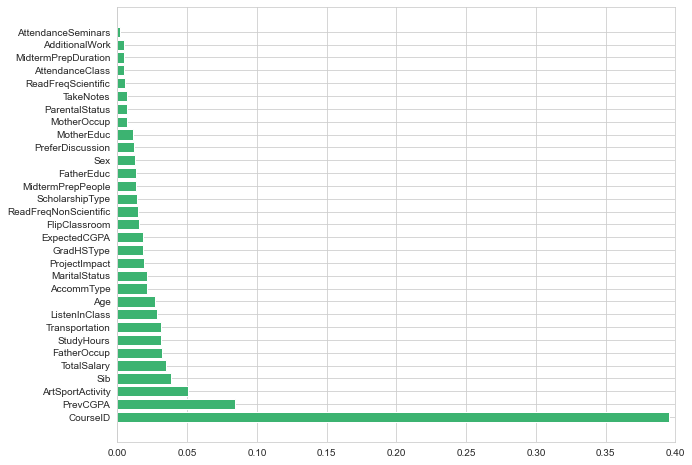

In [92]:
feat_importance_unzip = list(zip(*feat_importance))
plt.figure(figsize = (10,8))
plt.barh(feat_importance_unzip[0], feat_importance_unzip[1], color = 'mediumseagreen')
plt.xlim(0,0.4)
plt.show()

In [93]:
feat_importance = sorted(feat_importance, reverse = True,key = lambda x: x[1])

- Top 70% consists of 10 features
- Top 65% consists of 11 features
- Top 60% consists of 13 features
- Top 55% consists of 14 features
- Top 50% consists of 16 features
- Top 45% consists of 18 features

In [95]:
top_pct = [0.70, 0.65, 0.60, 0.55, 0.50, 0.45]
feat_importance_pct = []
for pct in top_pct:
    feat_importance_top_i_pct = int(len(feat_importance)*pct)
    print('Top',round(feat_importance_top_i_pct),'features in sorted feature importance')
    feat_importance_pct.append(feat_importance_top_i_pct)

Top 21 features in sorted feature importance
Top 20 features in sorted feature importance
Top 18 features in sorted feature importance
Top 17 features in sorted feature importance
Top 15 features in sorted feature importance
Top 13 features in sorted feature importance


In [96]:
[str(feat_num) + ' Features' for feat_num in feat_importance_pct]

['21 Features',
 '20 Features',
 '18 Features',
 '17 Features',
 '15 Features',
 '13 Features']

The top 70%, 65%, 60% and so on, are selected and used to train the Random Forest model to compare how this could possible affect the model's performance

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.88      0.89        29
weighted avg       0.90      0.90      0.90        29



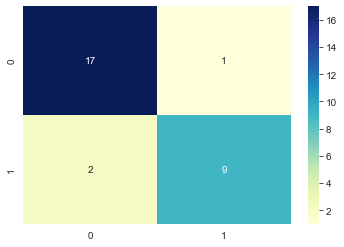

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.88      0.89        29
weighted avg       0.90      0.90      0.90        29



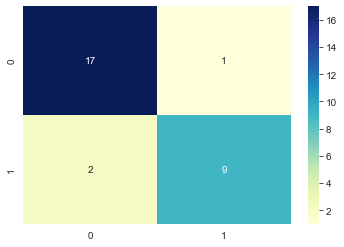

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.82      0.82      0.82        11

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



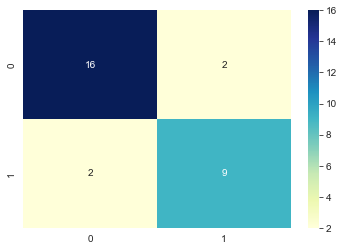

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.82      0.82      0.82        11

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



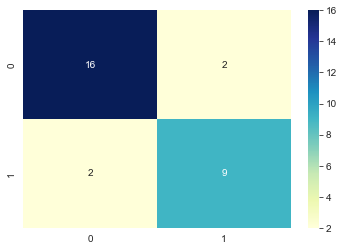

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.82      0.82      0.82        11

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



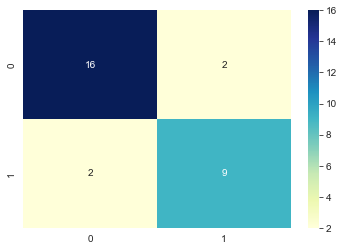

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.82      0.82      0.82        11

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



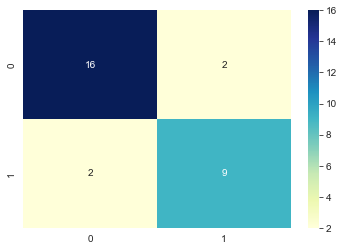

In [97]:
rf = RandomForestClassifier(criterion='entropy', max_features=None, random_state=42)

#Top 70%, 65%, 60%, 55%, 50%, 45% of the feature importance

for pct in feat_importance_pct:
    feat_importance_list = []

    for i in range(pct):
        feat_importance_list.append(feat_importance[i][0])

    df_feat_importance = df_feat_target_binary.loc[:,feat_importance_list]
    x = df_feat_importance
    y = df_feat_target_binary['OutputGrade']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
    plt.show()

Here I will be using weighted F1 score to compare the predictive performance of Random Forest using the Top 70%, 65%, 60%, 55%, 50% and 45% of the feature importance.

|         Model         | Weighted F1|
|:----------------------|:--------:|
|70%       |0.90|
|65%       |0.90|
|60%       |0.86|
|55%       |0.86|
|50%       |0.86|
|45%       |0.86|

\
The highest weighted F1 score, at 0.90, remains consistent when used the 70% and 65% of the features holding high feature importance value when employing the Random Forest feature importance approach. The performance between these two subsets is comparable, even when using accuracy, weighted precision, and weighted recall to evaluate the performances.

Similarly, the data frame used to train Gradient boosting is the same as the preivous method.

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.89      0.73      0.80        11

    accuracy                           0.86        29
   macro avg       0.87      0.84      0.85        29
weighted avg       0.86      0.86      0.86        29



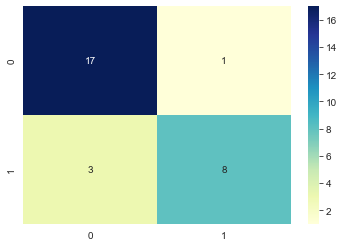

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.89      0.73      0.80        11

    accuracy                           0.86        29
   macro avg       0.87      0.84      0.85        29
weighted avg       0.86      0.86      0.86        29



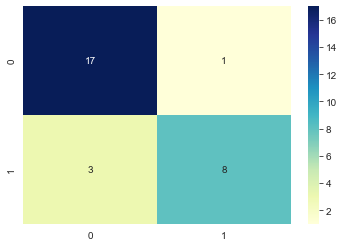

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.89      0.73      0.80        11

    accuracy                           0.86        29
   macro avg       0.87      0.84      0.85        29
weighted avg       0.86      0.86      0.86        29



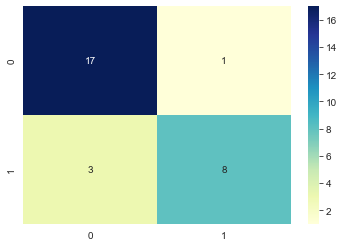

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.89      0.73      0.80        11

    accuracy                           0.86        29
   macro avg       0.87      0.84      0.85        29
weighted avg       0.86      0.86      0.86        29



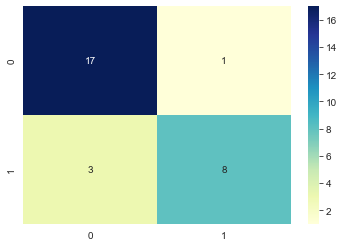

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.89      0.73      0.80        11

    accuracy                           0.86        29
   macro avg       0.87      0.84      0.85        29
weighted avg       0.86      0.86      0.86        29



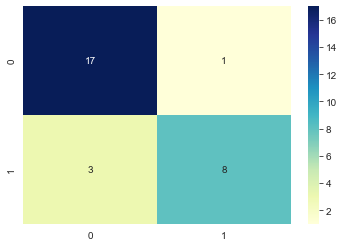

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.80      0.73      0.76        11

    accuracy                           0.83        29
   macro avg       0.82      0.81      0.81        29
weighted avg       0.83      0.83      0.83        29



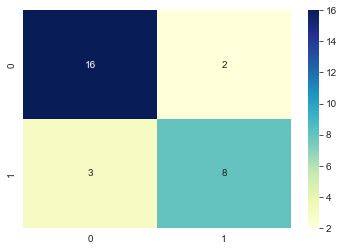

In [98]:
gbc = GradientBoostingClassifier(n_estimators=25, learning_rate = 0.1, random_state=42)

#Top 70%, 65%, 60%, 55%, 50%, 45% of the feature importance

for pct in feat_importance_pct:
    feat_importance_list = []

    for i in range(pct):
        feat_importance_list.append(feat_importance[i][0])

    df_feat_importance = df_feat_target_binary.loc[:,feat_importance_list]
    x = df_feat_importance
    y = df_feat_target_binary['OutputGrade']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
    plt.show()

|         Model         | Weighted F1 (RF)| Weighted F1(GB)|
|:----------------------|:--------:|:--------:|
|70%       |<b>0.90|0.86|
|65%       |<b>0.90|0.86|
|60%       |0.86|0.86|
|55%       |0.86|0.86|
|50%       |0.86|0.86|
|45%       |<b>0.86|0.83|

\
Gradient Boosting achieves its highest weighted F1 score of 0.86, which is lower compared to when the model was trained with highly correlated features, achieving around 0.89. Additionally, other performance metrics also demonstrate a contrast, with a weighted precision of 0.91 when trained with highly correlated features, surpassing the weighted precision of 0.86 when trained with features selected using the feature importance approach.

It is evident that the models demonstrate improved performance when trained with highly correlated features in comparison to implementing feature importance as the method for feature selection. This results in a more favourable overall score.

Trained with binary-transformed dataset (All features):

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Random Forest       |0.86|0.86|0.86|0.86|
|Gradient Boosting   |0.86|0.86|0.86|0.86|


Trained with binary-transformed dataset + intuitively dropping features:

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Random Forest       |0.83|0.83|0.83|0.82|
|Gradient Boosting   |0.83|0.83|0.83|0.82|



Trained with binary-transformed datasets with highly correlated features:

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|<b>Random Forest       |<b>0.90|<b>0.90|<b>0.90|<b>0.90|
|<b>Gradient Boosting   |<b>0.90|<b>0.91|<b>0.90|<b>0.89|



Trained with binary-transformed datasets with low correlated features:

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Random Forest       |0.48|0.47|0.48|0.48|
|Gradient Boosting   |0.62|0.63|0.62|0.62|



Trained with binary-transformed datasets with 70% of features holding the highest feature importance value:

|         Model         | Accuracy | Weighted Precision | Weighted Recall | Weighted F1|
|:----------------------|:--------:|:------------------:|:---------------:|:----------:|
|Random Forest       |0.90|0.90|0.90|0.90|
|Gradient Boosting   |0.86|0.86|0.86|0.83|
    


Based on the available information, I will proceed with the final experiment, which involves determining the optimal parameters for the models and evaluating their performance using the dataset that has been binary-transformed with highly correlated features.

GridSearch is performed to find the optimal parameters for both Random Forest and Gradient boosting

In [99]:
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()

The following are the optimal parameters for the Random Forest model, along with the corresponding best score obtained through 5-fold cross-validation.

In [100]:
params_rf = {'n_estimators':[200,400],
             'criterion':['gini','entropy'],
             'max_features':['sqrt','log2',None],
             'random_state':[0, 42]}

grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)

print('Best Parameters:',grid_rf.best_params_)
print('Best Score:',round(grid_rf.best_score_,2))

Best Parameters: {'criterion': 'entropy', 'max_features': None, 'n_estimators': 200, 'random_state': 0}
Best Score: 0.84


The following are the optimal parameters for the Gradient Boosting model, along with the corresponding best score obtained through 5-fold cross-validation.

In [101]:
params_gbc = {'n_estimators':[25,50],
              'learning_rate':[0.1],
              'criterion':['friedman_mse','squared_error'],
              'max_features':['sqrt','log2',None],
              'random_state':[0,42]}

grid_gbc = GridSearchCV(estimator=gbc, param_grid=params_gbc, cv=5, scoring='accuracy')
grid_gbc.fit(x_train, y_train)

print('Best Parameters:',grid_gbc.best_params_)
print('Best Score:',round(grid_gbc.best_score_,2))

Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_features': None, 'n_estimators': 50, 'random_state': 42}
Best Score: 0.81


## Binary transformed dataset (All features) <a name="FinalBinaryTransform"></a>

## Highly correlated features <a name="FinalHighCorrFeat"></a>

### Splitting the data <a name="FinalHighCorrFeatSplit"></a>

In [107]:
x = df_features_high_corr
y = df_feat_target_binary['OutputGrade']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

### Training Random Forest and Gradient Boosting <a name="FinalHighCorrFeatTraining"></a>

Cross-validation technique is used to guarantees that the models have seem every data point at least once during the training process.

In [117]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features=None, random_state=0)
gbc = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.1, max_features=None, n_estimators=25, random_state=0)

skf = StratifiedKFold(n_splits=5, shuffle=True ,random_state=42)

cvs_rf = cross_val_score(rf, x_train, y_train, scoring='f1', cv=skf)
cvs_gbc = cross_val_score(gbc, x_train, y_train, scoring='f1', cv=skf)

print('Random Forest')
print('Min F1 across 5 folds:',round(min(cvs_rf),3))
print('Mean F1 across 5 folds :',round(cvs_rf.mean(),3))
print('Max F1 across 5 folds:',round(max(cvs_rf),3),'\n')
print('-------------------------------------------')
print('Gradient Boosting')
print('Min F1 across 5 folds:',round(min(cvs_gbc),3))
print('Mean F1 across 5 folds:',round(cvs_gbc.mean(),3))
print('Max F1 across 5 folds:',round(max(cvs_gbc),3))
print('-------------------------------------------')
rf.fit(x_train, y_train)
gbc.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)
y_pred_gbc = gbc.predict(x_test)
y_prob_gbc = gbc.predict_proba(x_test)

Random Forest
Min F1 across 5 folds: 0.556
Mean F1 across 5 folds : 0.676
Max F1 across 5 folds: 0.9 

-------------------------------------------
Gradient Boosting
Min F1 across 5 folds: 0.588
Mean F1 across 5 folds: 0.709
Max F1 across 5 folds: 0.9
-------------------------------------------


These F1 scores offer insights into the models' performance, considering precision and recall. The minimum, mean, and maximum F1 scores provide a range of performance across different folds. Both Random Forest and Gradient Boosting demonstrate a range of F1 scores, with Gradient Boosting generally achieving slightly higher mean and minimum F1 scores compared to Random Forest.

### Performance Evaluation <a name="FinalHighCorrFeatPerformanceEval"></a>

##### Classification Report <a name="FinalHighCorrFeatCR"></a>

In [109]:
print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print('-----------------------------------------------------')
print('Gradient Boosting')
print(classification_report(y_test, y_pred_gbc))

Random Forest
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.88      0.89        29
weighted avg       0.90      0.90      0.90        29

-----------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.73      0.84        11

    accuracy                           0.90        29
   macro avg       0.93      0.86      0.88        29
weighted avg       0.91      0.90      0.89        29



##### Confusion matrix <a name="FinalHighCorrFeatCM"></a>

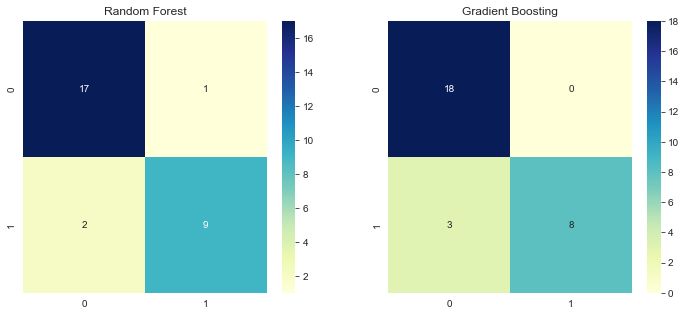

In [110]:
fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

sns.heatmap(cm_rf, annot = True, cmap = 'YlGnBu', ax=axes[0])
axes[0].set_title('Random Forest')

sns.heatmap(cm_gbc, annot = True, cmap = 'YlGnBu', ax=axes[1])
axes[1].set_title('Gradient Boosting')
plt.show()

##### ROC-AUC score & curve <a name="FinalHighCorrFeatROC"></a>

ROC-AUC score for random forest: 0.934 | ROC-AUC score for random forest: 0.937


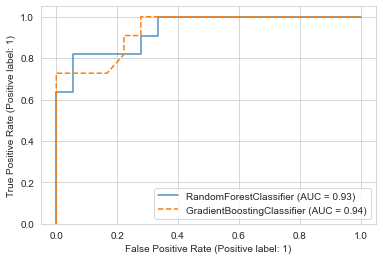

In [111]:
print('ROC-AUC score for random forest:',round(roc_auc_score(y_test, y_prob_rf[:,1]),3),'| ROC-AUC score for random forest:',round(roc_auc_score(y_test, y_prob_gbc[:,1]),3))

rf_roc_curve = RocCurveDisplay.from_estimator(rf, x_test, y_test, alpha = 0.8)
RocCurveDisplay.from_estimator(gbc, x_test, y_test, linestyle = '--',ax=rf_roc_curve.ax_)
plt.ylim(0)
plt.show()

# Conclusion <a name="conclusion"></a>

The outcomes of this experiment are as followed:
- The performance of the chosen models was notably affected by the "shape" of our data. Because our dataset is relatively small and contains numerous classes, the models did not perform as well as expected. However, upon categorizing the classes into only two (class 0 and 1), a significant improvement in the performance of our predictive model was observed.



- One-Hot Encoding can significantly influence various models, negatively impacting tree models and ensemble models, leading to notably poorer performance. It induces a substantial increase in the number of features, potentially triggering the curse of dimensionality, thereby making the models more complex and potentially resulting overfitting. Conversely, it can have a positive impact on probabilistic models like Naive Bayes. The observed improvement in the weighted precision and weighted F1 score in the Categorical Naive Bayes model following one-hot encoding can be attributed to the nature of the Naive Bayes algorithm as it relies on the assumption of independence between features, and when the data undergoes one-hot encoding, categorical variables are transformed into a binary feature, supporting the independence assumption.



- In the case of classification models there seems to be a slight improvement in some aspect of the models' performance. Evidently, training the model using highly correlated data led to an enhancement in the weighted F1 score of the Gradient Boosting model as well as a slight enhancement in the ROC-AUC score, suggesting improvement in terms of the ability to distingush between the distinct classes. The interaction among highly correlated features could be positively influencing the models, aiding them in capturing intricate relationships within the dataset. It was also noted that the splitting of the data may also have some influence in making the features interact with each other in a way which resulted in an improvement of the performance.



- Lastly, in the context of this dataset, it was discovered that implementing correlation as an approach for feature selection is more effective than feature importance. My finding suggests that considering the interdependence of features through correlation matrix provided better results in feature selection. The dataset's characteristics and the nature of relationships among features seem to play a major role, making correlation the better feature selection approach over feature importance.



# References <a name="References"></a>
1. Alhamid, M. (2021) Ensemble Models Medium. 15 March 2021 [online]. Available from: https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c.

2. B. Jothi and M. Pushpalatha (2022) Understanding trends in higher education student performance using machine learning techniques. 2022 IEEE 2nd Mysore Sub Section International Conference (MysuruCon) [online].

3. Castillo, D. (2021) Decision trees in machine learning explained Seldon. 13 November 2021 [online]. Available from: https://www.seldon.io/decision-trees-in-machine-learning.

4. R, A. (no date) The Importance of Decision Trees in Machine Learning www.turing.com [online]. Available from: https://www.turing.com/kb/importance-of-decision-trees-in-machine-learning#categorical-variable-decision-tree.

5. Ray, S. (2019) 6 Easy Steps to Learn Naive Bayes Algorithm (with code in Python) Analytics Vidhya. 3 September 2019 [online]. Available from: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.

6. Yilmaz, N. and Şekeroğlu, B. (2023) UCI Machine Learning Repository archive.ics.uci.edu. 14 August 2023 [online]. Available from: https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation.